# Steps for Data Preprocessing

* Step 1 :Import important libraries
* Step 2: Import dataset
* Step 3: Preprocessing: Find duplicates, Missing value treatment, Encoding, Handling data types, Outlier treatment, Feature scaling, Data balancing

In [1]:
## import important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Important Libraries
Purpose of Libraries
 * os: Functions to interact with the operating system.
 * Example Usage: os.listdir() lists files and directories in the specified path.
 * numpy: Support for arrays, matrices, and mathematical functions.
 * pandas: Data manipulation and analysis.
 * matplotlib & seaborn: Data visualization.
 * sns.set(): Automatically sets the seaborn plot aesthetics to a default 
 * warnings: Manage warning messages in code theme.
 * %matplotlib inline: A magic command used in Jupyter notebooks to display matplotlib plots inline within the notebook.

In [2]:
dataset = pd.read_csv(r'Datasets\titanic3.csv')
dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
dataset.drop_duplicates(keep='first', inplace=True)

### Handling missing values
- For categorical variable fill it with mode
- For numerical fill it with mean or median
- Depending upon no. of missing values you drop the entire feature itself (feature which has 40% missing values)
- If dataset contains less number of missing values drop entitre row

In [4]:
dataset.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [5]:
columns_to_be_removed = []
for column in dataset.columns:
    percentage = dataset[column].isnull().sum()/len(dataset) * 100
    if percentage > 40:
        columns_to_be_removed.append(column)
    print(f"{column} has {percentage} percentage of missing values\n")
print(columns_to_be_removed)

pclass has 0.07633587786259542 percentage of missing values

survived has 0.07633587786259542 percentage of missing values

name has 0.07633587786259542 percentage of missing values

sex has 0.07633587786259542 percentage of missing values

age has 20.15267175572519 percentage of missing values

sibsp has 0.07633587786259542 percentage of missing values

parch has 0.07633587786259542 percentage of missing values

ticket has 0.07633587786259542 percentage of missing values

fare has 0.15267175572519084 percentage of missing values

cabin has 77.48091603053436 percentage of missing values

embarked has 0.22900763358778628 percentage of missing values

boat has 62.90076335877862 percentage of missing values

body has 90.76335877862596 percentage of missing values

home.dest has 43.12977099236641 percentage of missing values

['cabin', 'boat', 'body', 'home.dest']


In [6]:
dataset.drop(columns=columns_to_be_removed, axis=1, inplace= True)
dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [7]:
dataset.isnull().sum()

pclass        1
survived      1
name          1
sex           1
age         264
sibsp         1
parch         1
ticket        1
fare          2
embarked      3
dtype: int64

### Various imputation Approaches are:
 * Simple Statistical Imputation:
 * Mean: If no outliers.
 * Median:If data have outliers.
 * Mode : If variables are categorical type

<Axes: >

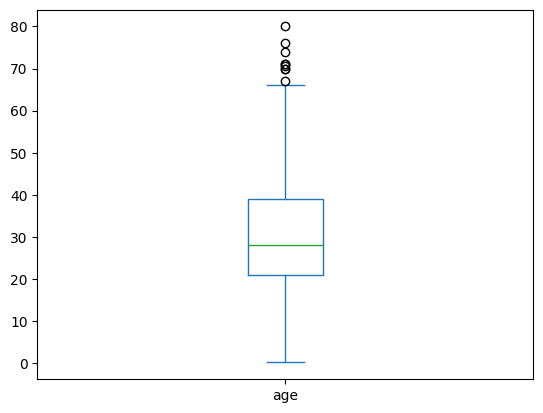

In [8]:
dataset['age'].plot(kind = 'box')

In [9]:
Q1 = dataset['age'].quantile(0.25)
Q3 = dataset['age'].quantile(0.75)
lessthan_Q1 = [value for value in dataset['age'] if value < Q1]
greaterthan_Q3 = [value for value in dataset['age'] if value > Q3]
len(lessthan_Q1), len(greaterthan_Q3)

(249, 245)

### Here we can also use standard score(Z score) instead outliers
* In statistics, the standard score is the number of standard deviations by which the value of a raw score (i.e., an observed value or data point) is above or below the mean value of what is being observed or measured. Raw scores above the mean have positive standard scores, while those below the mean have negative standard scores.

* z = (X – μ) / σ

* Z-Score > 2 or < -2: Often considered unusual or significant, indicating the data point is more than 2 standard deviations away from the mean.
* Z-Score > 3 or < -3: Typically considered an outlier, suggesting the data point is extremely far from the mean.

In [10]:
## In this 'pclass', 'survived', 'name', 'sex', 'embarked' are categorical features use mode
## 'sibsp', 'parch', 'fare' are numerical features use mean and ticket feature can be dropped as it is not required
## since 'age' has many outliers use medain

categorical_features = ['pclass', 'survived', 'name', 'sex', 'embarked']
numerical_features = ['sibsp', 'parch', 'fare']
categorical_sum = 0
numerical_sum = 0
for feature in categorical_features:
    dataset[feature] = dataset[feature].fillna(dataset[feature].mode()[0])
    categorical_sum += 1
for feature in numerical_features:
    dataset[feature] = dataset[feature].fillna(dataset[feature].mean())
    numerical_sum += 1
dataset['age'] = dataset['age'].fillna(dataset['age'].median())
categorical_sum, numerical_sum

(5, 3)

In [11]:
dataset.isnull().sum()


pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      1
fare        0
embarked    0
dtype: int64

In [12]:
## since ticket and name is not required we can drop ticket
dataset.drop(columns=['ticket', 'name'], axis=1, inplace=True)
dataset.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1310 non-null   float64
 1   survived  1310 non-null   float64
 2   sex       1310 non-null   object 
 3   age       1310 non-null   float64
 4   sibsp     1310 non-null   float64
 5   parch     1310 non-null   float64
 6   fare      1310 non-null   float64
 7   embarked  1310 non-null   object 
dtypes: float64(6), object(2)
memory usage: 82.0+ KB


### Encoding

In [14]:
## Use onehot encoding for sex and label encoding for embarked
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder(sparse_output= False)
dataset['embarked'] = le.fit_transform(dataset['embarked'])
encoded = ohe.fit_transform(dataset[['sex']])
encoded_df = pd.DataFrame(encoded, columns= ohe.get_feature_names_out())
final_dataset = pd.concat([dataset.drop(columns=['sex'], axis=1), encoded_df], axis=1)
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1310 non-null   float64
 1   survived    1310 non-null   float64
 2   age         1310 non-null   float64
 3   sibsp       1310 non-null   float64
 4   parch       1310 non-null   float64
 5   fare        1310 non-null   float64
 6   embarked    1310 non-null   int64  
 7   sex_female  1310 non-null   float64
 8   sex_male    1310 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 92.2 KB


In [17]:
final_dataset['embarked'].unique()

array([2, 0, 1])

In [18]:
final_dataset.describe()

,pclass,survived,age,sibsp,parch,fare,embarked,sex_female,sex_male
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000
mean,2.295420,0.381679,29.502036,0.498854,0.385027,33.295479,1.493893,0.355725,0.644275
std,0.837742,0.485984,12.900383,1.041260,0.865230,51.719113,0.814053,0.478915,0.478915
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000,0.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,2.000000,0.000000,1.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,2.000000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,2.000000,1.000000,1.000000


## Feature Scaling

In [16]:
X, y = final_dataset.drop(columns=['embarked']).values, final_dataset['embarked'].values
X, y

(array([[  1.        ,   1.        ,  29.        , ..., 211.3375    ,
           1.        ,   0.        ],
        [  1.        ,   1.        ,   0.9167    , ..., 151.55      ,
           0.        ,   1.        ],
        [  1.        ,   0.        ,   2.        , ..., 151.55      ,
           1.        ,   0.        ],
        ...,
        [  3.        ,   0.        ,  27.        , ...,   7.225     ,
           0.        ,   1.        ],
        [  3.        ,   0.        ,  29.        , ...,   7.875     ,
           0.        ,   1.        ],
        [  3.        ,   0.        ,  28.        , ...,  33.29547928,
           0.        ,   1.        ]], shape=(1310, 8)),
 array([2, 2, 2, ..., 0, 2, 2], shape=(1310,)))

In [ ]:
from sklearn.preprocessing import StandardScaler